In [1]:
import matplotlib as mpl
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd

%matplotlib inline

mpl.rcParams["text.latex.preamble"] = r"\usepackage{siunitx}"

# Read the Data

We will compare recordings at 15, 40 and 80cm distance from the camera.

In [2]:
e15 = pd.read_csv("data/25-gestures/distances/15cm/events.csv")
e40 = pd.read_csv("data/25-gestures/distances/40cm/events.csv")
e80 = pd.read_csv("data/25-gestures/distances/80cm/events.csv")

# Plotting the Event Densities

In [3]:
def event_density(events, bin_length=1*10**5):
    ts = events["timestamp"].as_matrix()
    ts_min, ts_max = ts.min(), ts.max()
    length = ts_max - ts_min
    nbins = int(np.ceil(length / bin_length))
    bin_edges = np.linspace(ts_min, ts_min + nbins * bin_length, num=nbins, endpoint=True)
    hist, _ = np.histogram(ts, bins=bin_edges)
    bin_centers = (bin_edges + bin_length / 2)[:-1]
    
    hist = pd.DataFrame(hist)
    hist = hist.rolling(10).mean()
    
    return bin_centers, hist * (10**6 / bin_length)

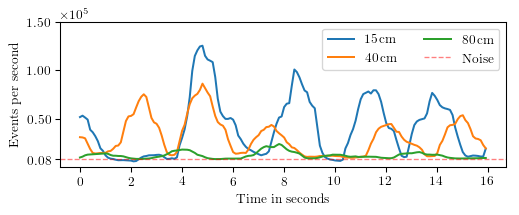

In [4]:
fig, ax = pp.subplots(1, 1, dpi=96, figsize=(6, 2))

for ev, d in [(e15, 15), (e40, 40), (e80, 80)]:
    X, Y = event_density(ev)
    
    X -= X.min()
    
    #X = np.linspace(0, 1, len(X))
    fltr = (X >= 2 * 10**7) & (X <= 3.6 * 10**7)
    X = X[fltr]
    Y = Y[fltr]
    
    # Convert time to seconds starting at 0
    X -= X.min()
    X /= 10**6
    
    ax.plot(X, Y, label=r"\SI{{{}}}{{\centi\meter}}".format(d))

ax.axhline(8000, 0, 1, c="r", ls="dashed", lw=1, alpha=0.5, label="Noise")
ax.set_yticks([8000, 50000, 100000, 150000])
ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
ax.set_ylabel("Events per second")
ax.set_xlabel("Time in seconds")
ax.legend(loc="upper right", ncol=2)

In [5]:
fig.savefig("../doc/figures/dataset/densities.pdf", bbox_inches="tight")